In [3]:
# importing relevant libraries

import numpy as np
import cmath
import matplotlib.pyplot as plt



In [25]:
def potential(t, f):

    # defining a function that will give phi based on a time array and frequency

    phi_vals = np.zeros(len(t))

    for i in range(len(t)):
        phi_vals[i] = np.sin(t[i] * f)
        

    return phi_vals

In [6]:
# defining the clock oscillators 

omega = 0.2

# each clock has a value of phi that varies according to time t




clockA_amp = 1
A_phase = 0
coord_timeA = np.arange(1,100,1)
clockA_phi = 1e-3
print(clockA_phi)

def clock(amp, phi, phase, coord_time, omega):

    Avals = np.zeros(len(coord_time),dtype=complex)
  
    for i in range(len(coord_time)):
        
        cplex = omega*(1+phi)*coord_time[i]
        exponent = complex(phase,cplex)
        #print(exponent)
        time = amp * cmath.exp(exponent)
        
        Avals[i] = time
        

    #print(Avals)
    return Avals

clockA_vals = clock(clockA_amp, clockA_phi, A_phase, coord_timeA, omega)





0.001


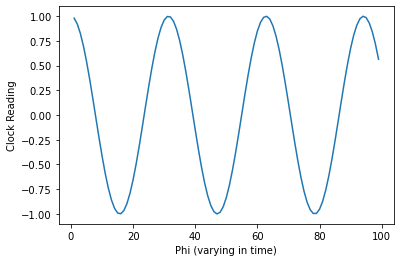

In [8]:
# plotting only the real part

realAvals = clockA_vals.real


plt.figure("Clock A Real")
plt.plot(coord_timeA, realAvals)
plt.xlabel("Phi (varying in time)")
plt.ylabel("Clock Reading")
plt.show()



/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


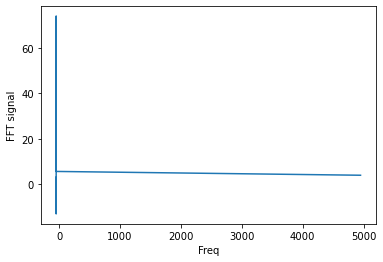

In [23]:
# now fft the values

import scipy
from scipy.fft import fft, ifft

# fft the time and signal
freqA = fft(coord_timeA)
fft_signalA = fft(clockA_vals)

real_fft_signalA = fft_signalA.real

plt.figure("Clock A FFT")
plt.plot(freqA, real_fft_signalA)
plt.xlabel("Freq")
plt.ylabel("FFT signal")
plt.show()






In [57]:
# defining clock B

clockB_amp = 1
B_phase = 0
coord_timeB = np.arange(1,50,0.5)
clockB_phi = 40


clockB_vals = clock(clockB_amp, clockB_phi, B_phase, coord_timeB, omega)

freqB = fft(coord_timeB)

fft_signalB = fft(clockB_vals)

real_fft_signalB = fft_signalB.real

realB_vals = clockB_vals.real

xcorr_phi = clockA_phi - clockB_phi

xcorrelate = clock(clockA_amp, xcorr_phi, B_phase, coord_timeA,omega)

fft_xcorr = fft(xcorrelate)

real_fft_xcorr = fft_xcorr.real

real_xcorrelate = xcorrelate.real

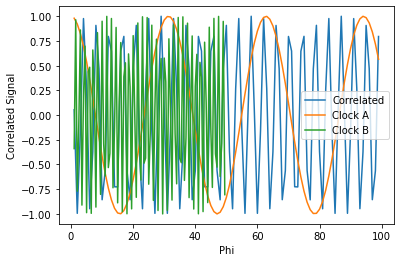

In [58]:
plt.figure("Cross Correlated Clocks")
plt.plot(coord_timeA, real_xcorrelate, label = "Correlated")
plt.plot(coord_timeA, realAvals, label = "Clock A")
plt.plot(coord_timeB, realB_vals, label = "Clock B")
plt.legend()
plt.xlabel("Phi")
plt.ylabel("Correlated Signal")
plt.show()

/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/suannlim/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


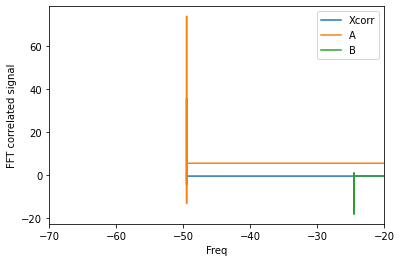

In [59]:
# fourier transforming the correlated signal

correlated_fft = fft(xcorrelate)
real_correlated_fft = correlated_fft.real

plt.figure("correlated fft")
plt.plot(freqA, real_correlated_fft, label = "Xcorr")
plt.plot(freqA, real_fft_signalA, label = "A")
plt.plot(freqB, real_fft_signalB, label = "B")
plt.xlabel("Freq")
plt.ylabel("FFT correlated signal")
plt.legend()
plt.xlim((-70,-20))
plt.show()